Epoch 0, Loss: 0.090948
Epoch 500, Loss: 0.001454
Epoch 1000, Loss: 0.001011
Epoch 1500, Loss: 0.001002
Epoch 2000, Loss: 0.001001
Epoch 2500, Loss: 0.001002
Epoch 3000, Loss: 0.001000
Epoch 3500, Loss: 0.001000
Epoch 4000, Loss: 0.001000
Epoch 4500, Loss: 0.001000

Final Weights and Biases:
W1:
 [[-0.0782588  -0.40036733  1.94349144]
 [ 0.06029334 -0.20253762  0.17108472]
 [ 0.36666566  0.63134781  1.39454828]]
b1:
 [[ 0.02888333  0.11013171 -0.38398613]]
W2:
 [[-0.31215378]
 [-0.77848436]
 [ 2.42447464]]
b2:
 [[1.28627244]]

Predictions (normalized):
[[0.60007609]
 [0.66659701]
 [0.78351559]
 [0.78351559]
 [0.99963613]]

Predictions in $k:
[[18.00228262]
 [19.9979102 ]
 [23.50546779]
 [23.50546779]
 [29.98908385]]


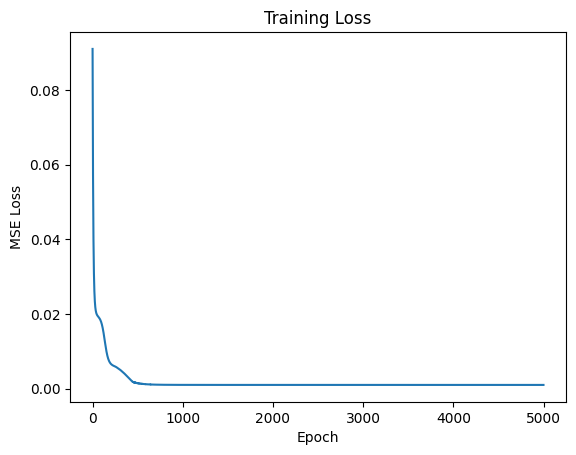

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. DATA
# =========================

X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
], dtype=float)

y = np.array([[18], [20], [22], [25], [30]], dtype=float)

# Нормализация входов
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Нормализация выхода (так как sigmoid)
y = y / 30.0


# =========================
# 2. INITIALIZATION
# =========================

np.random.seed(42)

W1 = np.random.randn(3, 3) * 0.1
b1 = np.zeros((1, 3))

W2 = np.random.randn(3, 1) * 0.1
b2 = np.zeros((1, 1))


# =========================
# 3. ACTIVATIONS
# =========================

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# =========================
# 4. TRAINING
# =========================

learning_rate = 0.05
epochs = 5000
losses = []

for i in range(epochs):

    # ---- Forward ----
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    loss = np.mean((y - A2) ** 2)
    losses.append(loss)

    # ---- Backward ----
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # ---- Update ----
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if i % 500 == 0:
        print(f"Epoch {i}, Loss: {loss:.6f}")


# =========================
# 5. FINAL RESULTS
# =========================

print("\nFinal Weights and Biases:")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)

# Predictions
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2
predictions = sigmoid(Z2)

print("\nPredictions (normalized):")
print(predictions)

print("\nPredictions in $k:")
print(predictions * 30)


# =========================
# 6. LOSS PLOT
# =========================

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()
